## Decision Tree Regressor Air Quality Index Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Real_Combine.csv')



In [ ]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

<Axes: >

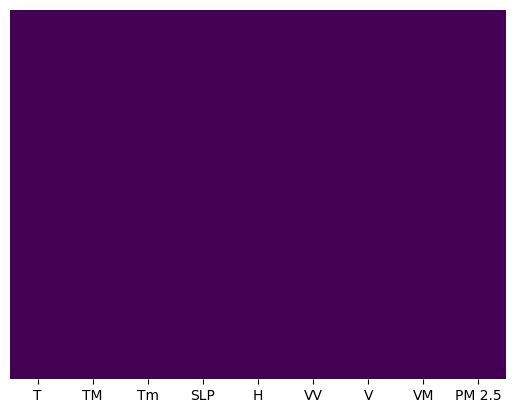

In [ ]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df=df.dropna()

In [ ]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [ ]:
## check null values
X.isnull()

T     TM     Tm    SLP      H     VV      V     VM
0     False  False  False  False  False  False  False  False
1     False  False  False  False  False  False  False  False
2     False  False  False  False  False  False  False  False
3     False  False  False  False  False  False  False  False
4     False  False  False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...    ...    ...
1088  False  False  False  False  False  False  False  False
1089  False  False  False  False  False  False  False  False
1090  False  False  False  False  False  False  False  False
1091  False  False  False  False  False  False  False  False
1092  False  False  False  False  False  False  False  False

[1092 rows x 8 columns]

In [ ]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

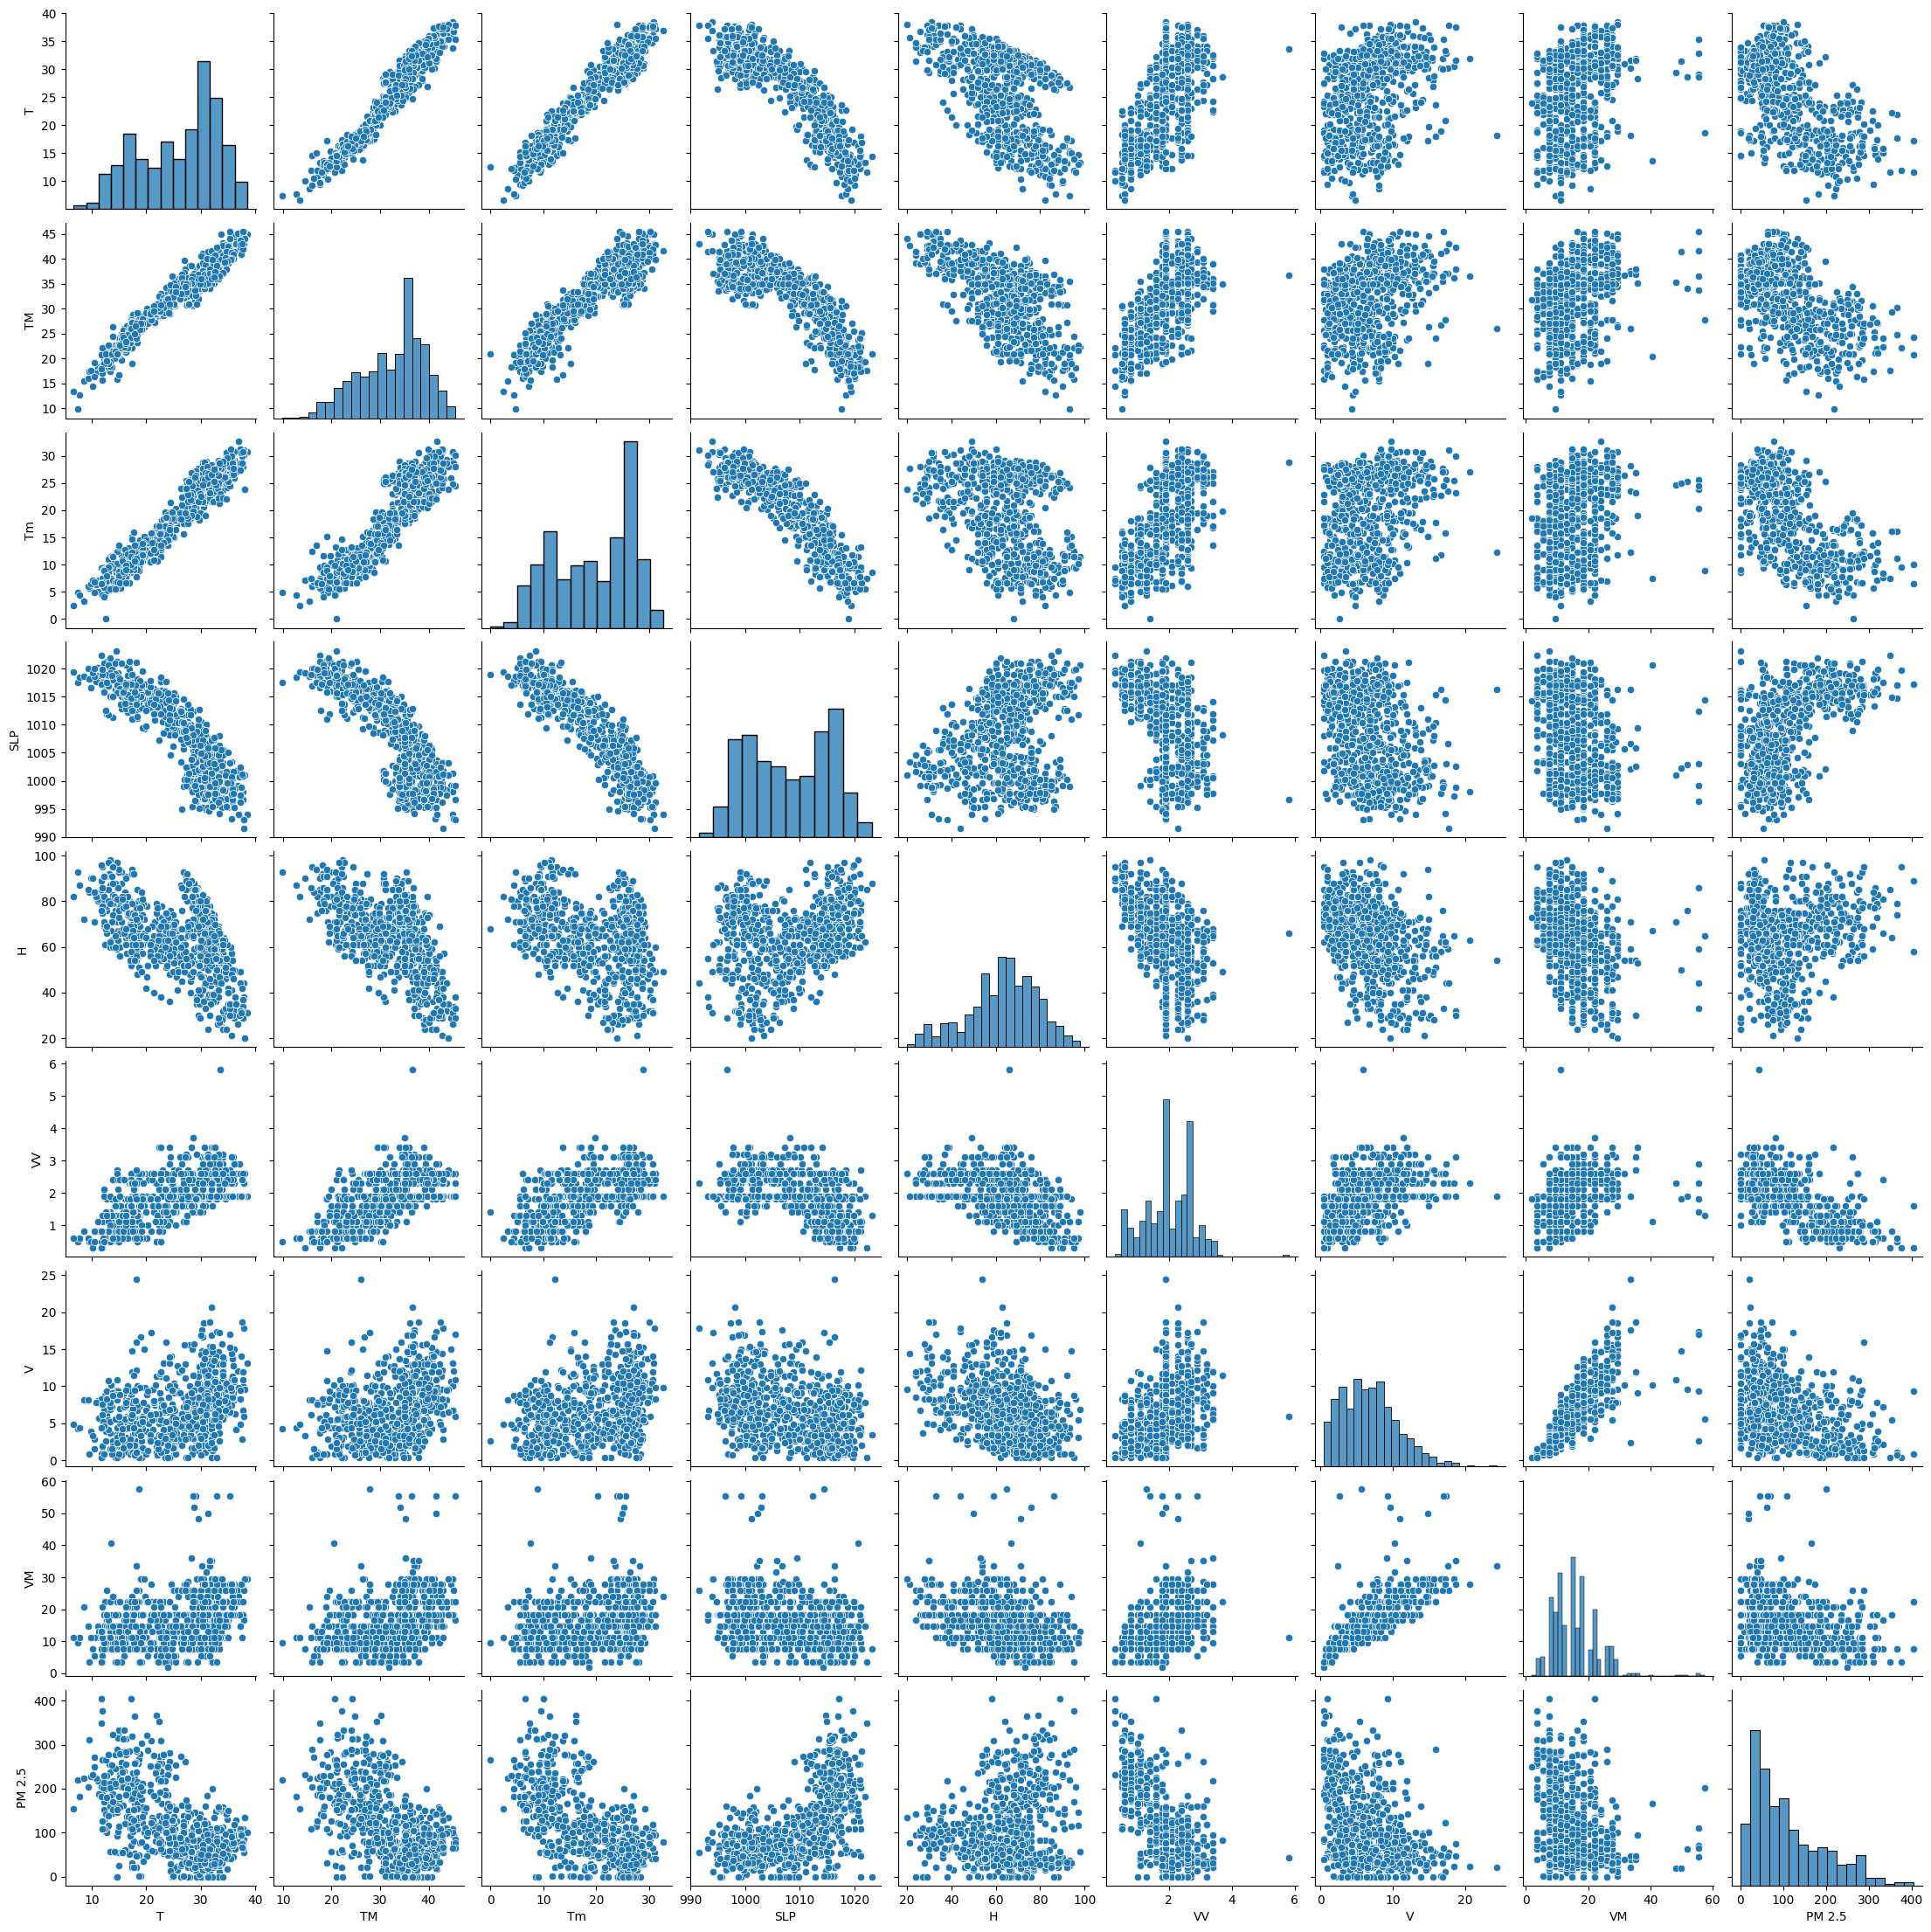

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967536  0.953719 -0.881409 -0.509299  0.640792  0.301994   
TM      0.967536  1.000000  0.892031 -0.822958 -0.586681  0.606945  0.292949   
Tm      0.953719  0.892031  1.000000 -0.917518 -0.287357  0.577240  0.296225   
SLP    -0.881409 -0.822958 -0.917518  1.000000  0.240256 -0.517915 -0.329838   
H      -0.509299 -0.586681 -0.287357  0.240256  1.000000 -0.465374 -0.380575   
VV      0.640792  0.606945  0.577240 -0.517915 -0.465374  1.000000  0.376873   
V       0.301994  0.292949  0.296225 -0.329838 -0.380575  0.376873  1.000000   
VM      0.287738  0.297011  0.266782 -0.310704 -0.362177  0.342442  0.775655   
PM 2.5 -0.631462 -0.568409 -0.673824  0.623187  0.138005 -0.573941 -0.268530   

              VM    PM 2.5  
T       0.287738 -0.631462  
TM      0.297011 -0.568409  
Tm      0.266782 -0.673824  
SLP    -0.310704  0.623187  
H      -0.362177  0.138005  
VV      0.342442 -0.573941  
V       0.775655 -0.268530  
VM      1.000000 -0.215854  
PM 2.5 -0.215854  1.000000

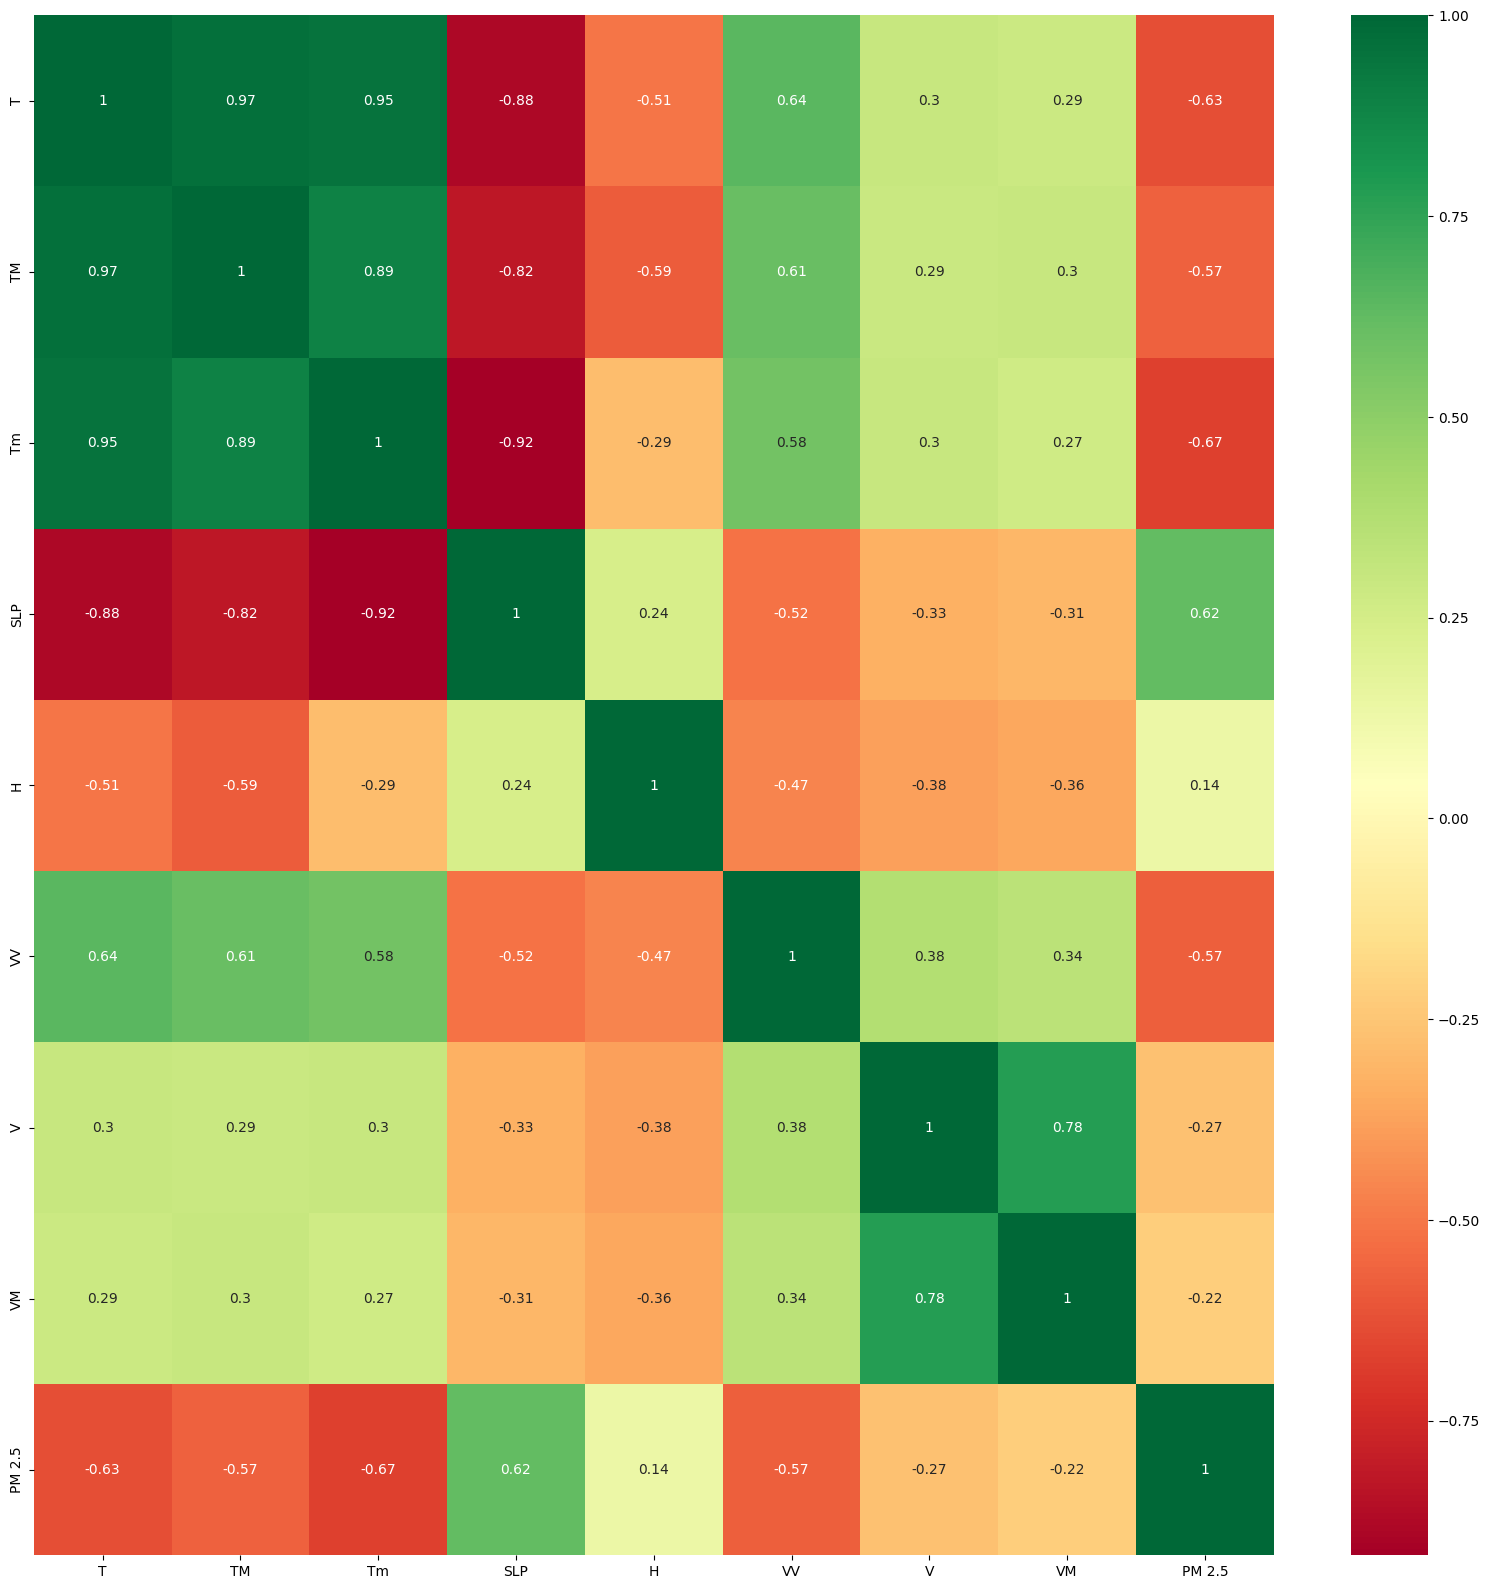

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [ ]:
print(model.feature_importances_)

[0.1879723  0.0979917  0.20751547 0.13812086 0.09004082 0.1827963
 0.05316085 0.0424017 ]


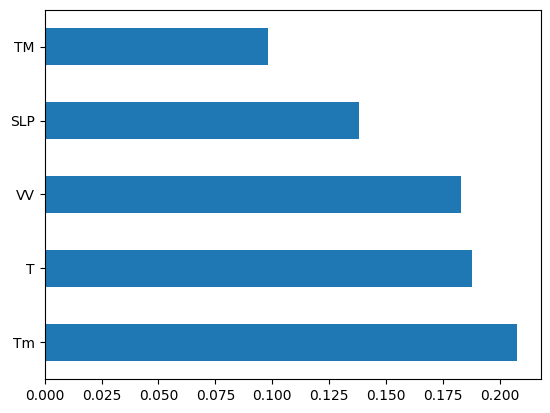

In [ ]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Decision Tree Regressor

<ipython-input-18-0f415a98584e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='PM 2.5', ylabel='Density'>

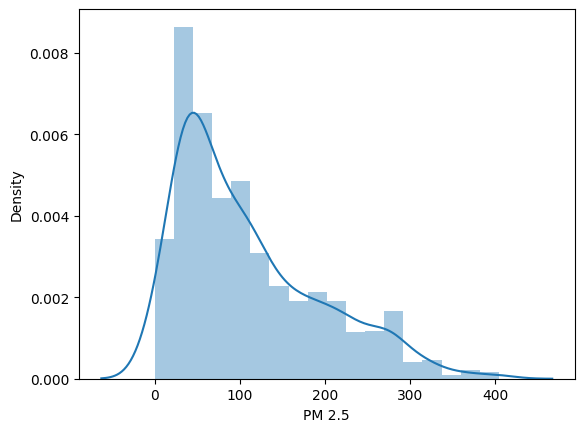

In [ ]:
sns.distplot(y)

### Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree=DecisionTreeRegressor(criterion="mse")

In [ ]:
dtree.fit(X_train,y_train)

InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'absolute_error', 'squared_error', 'friedman_mse', 'poisson'}. Got 'mse' instead.

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

In [ ]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [ ]:
score.mean()

In [ ]:
##conda install pydotplus
## conda install python-graphviz

from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus



In [ ]:
features = list(df.columns[:-1])
features

In [ ]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Model Evaluation

In [ ]:
prediction=dtree.predict(X_test)

In [ ]:
sns.distplot(y_test-prediction)

In [ ]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning DEcision Tree Regressor

In [ ]:
DecisionTreeRegressor()

In [ ]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]

}

In [ ]:

## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:

random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
random_search.best_params_

In [ ]:
random_search.best_score_

In [ ]:
predictions=random_search.predict(X_test)

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.141630924739424
MSE: 3171.808145980198
RMSE: 56.31880810155874


In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 23.38438770325203
MSE: 2262.633890953168
RMSE: 47.56715138573223
